In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = GradientBoostingRegressor()

# 2. Setup Pipeline

In [4]:
pca=PCA()
RG = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [6]:
param_grid = {
    "pca__n_components": [50, 100,170],
    "RG__learning_rate":[0.005,0.1,0.5,1,10],
    "RG__n_estimators":[10,100],
    "RG__min_samples_split":[0.01*i for i in range(1,3)],
    "RG__ccp_alpha":[0.005,0.1,0.5,10]
    
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train.values.ravel())

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__learning_rate': [0.005, 0.1, 0.5, 1, 10],
                         'RG__min_samples_split': [0.01, 0.02],
                         'RG__n_estimators': [10, 100],
                         'pca__n_components': [50, 100, 170]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.578):
{'RG__ccp_alpha': 0.005, 'RG__learning_rate': 0.1, 'RG__min_samples_split': 0.02, 'RG__n_estimators': 100, 'pca__n_components': 170}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__learning_rate,param_RG__min_samples_split,param_RG__n_estimators,param_pca__n_components,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,32.838930,11.272086,0.004055,0.004916,0.005,0.1,0.02,100,170,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-6.442861e-01,-7.253619e-01,-5.258316e-01,-5.466793e-01,-5.884618e-01,-6.182906e-01,-5.587304e-01,-5.781264e-01,0.064420,1
17,20.248411,9.825623,0.005094,0.001112,0.005,0.1,0.01,100,170,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-6.265085e-01,-7.023806e-01,-5.299855e-01,-5.711054e-01,-5.915841e-01,-6.306886e-01,-5.587304e-01,-5.784606e-01,0.057523,2
35,31.518975,13.782922,0.017815,0.036823,0.005,0.5,0.02,100,170,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-6.570530e-01,-6.780748e-01,-6.151243e-01,-6.176926e-01,-5.868158e-01,-6.337365e-01,-5.738809e-01,-6.037991e-01,0.047858,3
29,30.912638,13.819619,0.005255,0.004478,0.005,0.5,0.01,100,170,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-6.647896e-01,-6.895471e-01,-6.151243e-01,-6.359851e-01,-5.868158e-01,-6.075515e-01,-5.738809e-01,-6.066983e-01,0.048673,4
32,3.171074,2.461424,0.025389,0.053478,0.005,0.5,0.02,10,170,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-6.805843e-01,-7.186526e-01,-6.256506e-01,-6.582441e-01,-6.295800e-01,-6.856727e-01,-6.041580e-01,-6.408706e-01,0.047858,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,23.957444,8.310355,0.005784,0.006770,0.005,10,0.02,100,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-2.460717e+190,-2.574029e+190,-2.379689e+190,-2.295930e+190,-3.001299e+190,-2.638572e+190,-2.657070e+190,-2.588669e+190,inf,236
51,6.890482,2.322624,0.005286,0.000457,0.005,10,0.01,100,50,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-2.638797e+190,-2.430456e+190,-2.432697e+190,-2.477434e+190,-2.995719e+190,-2.443834e+190,-2.718110e+190,-2.601041e+190,inf,237
52,20.690993,7.185734,0.016756,0.033646,0.005,10,0.01,100,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-2.395819e+190,-2.805146e+190,-2.694835e+190,-2.319135e+190,-3.020694e+190,-2.663425e+190,-2.635336e+190,-2.643484e+190,inf,238
53,24.551361,8.242736,0.017852,0.034497,0.005,10,0.01,100,170,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",...,-3.184582e+190,-2.775623e+190,-2.843295e+190,-2.911023e+190,-3.102960e+190,-2.755597e+190,-2.975939e+190,-2.855767e+190,inf,239


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__learning_rate': 0.1, 'RG__min_samples_split': 0.02, 'RG__n_estimators': 100, 'pca__n_components': 170}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_lr = parms.iloc[0][0]['RG__learning_rate']
best_n_est = parms.iloc[0][0]['RG__n_estimators']
best_min_ss=parms.iloc[0][0]['RG__min_samples_split']
best_ccp_alpha=parms.iloc[0][0]['RG__ccp_alpha']
#best_pca=170
#best_lr=0.1
#best_n_est=100

In [13]:
Model_2 = GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1.values.ravel())

GradientBoostingRegressor(ccp_alpha=0.005, min_samples_split=0.02)

In [16]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [17]:
MSE(RG1.predict(PX_test1),Y_test1)

1.5602075164818732

In [18]:
result = pd.DataFrame(np.exp(Y_test1))

In [19]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [20]:
MSE(result["sales"],result["Predicted_sales"])

929.6231004884527

# 5.1 Model using original sales data

In [21]:
Model_3 = GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [22]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [24]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2.values.ravel())

GradientBoostingRegressor(ccp_alpha=0.005, min_samples_split=0.02)

In [25]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [26]:
MSE(RG2.predict(PX_test2),Y_test2)

2795.522088204886

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

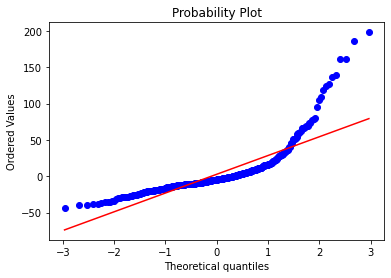

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

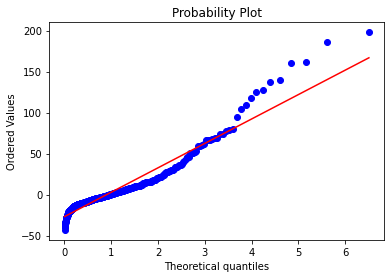

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

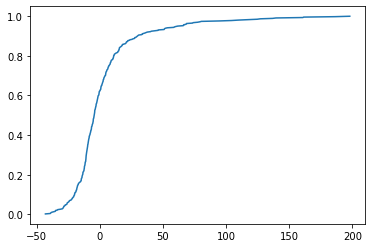

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

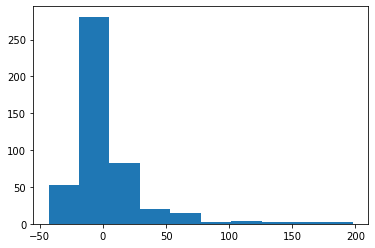

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

2.212368516346384

In [38]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24820.0

In [42]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

29936.0

In [43]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

30300.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [44]:
Model_4= GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [45]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K.ravel())
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [46]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.259231,0.323581,0.286418,0.241974,0.218372,0.321451,0.190083,0.317086,0.321403,0.234441,0.271404
Exponential,0.331916,0.371663,0.287455,0.284378,0.275907,0.392645,0.235256,0.349003,0.360684,0.304552,0.319346
Empirical,0.346897,0.377585,0.307500,0.287725,0.278969,0.400430,0.245957,0.356895,0.363010,0.320303,0.328527


In [47]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,10728.0,14644.0,13260.0,11276.0,10840.0,12552.0,9308.0,14624.0,14368.0,9764.0,12136.4,1921.564737
Exponential,13736.0,16820.0,13308.0,13252.0,13696.0,15332.0,11520.0,16096.0,16124.0,12684.0,14256.8,1644.824903
Empirical,14356.0,17088.0,14236.0,13408.0,13848.0,15636.0,12044.0,16460.0,16228.0,13340.0,14664.4,1537.240593
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [48]:
profit_table.to_csv(".\\Model_Selection_Result\\4.3A_Gradient_boosting.csv")